# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Gibran Daffa Atallah
- **Email:** gibrandaffa92@gmail.com
- **ID Dicoding:** gibrandaffa
- **Dataset:** [Bike Sharing Dataset](https://drive.google.com/file/d/1RaBmV6Q6FYWU4HWZs80Suqd7KQC34diQ/view?usp=sharing)

## Menentukan Pertanyaan Bisnis

- Bagaimana perkembangan penyewaan sepeda selama 1 tahun terakhir?
- Di musim apa sepeda paling sering disewakan?
- Di hari apa sepeda paling sering disewakan?
- Jam berapa sepeda paling sering disewakan?
- Di suhu berapa sepeda paling sering disewakan?

## Import Semua Packages/Library yang Digunakan

In [1]:
from math import floor
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Data Wrangling

### Gathering Data

In [2]:
day_df = pd.read_csv("data/day.csv")
day_df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [3]:
hour_df = pd.read_csv("data/hour.csv")
hour_df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


**Insight:**
- `day.csv` dan `hour.csv` memiliki data yang sama. Perbedaanya ialah `hour.csv` memiliki data setiap jam dalam 1 hari.
- Beberapa kolom direpresentasikan dengan angka yang mana bisa berupa nama berdasarkan pada `data/README.txt`.

### Assessing Data

#### Day

In [4]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Tidak ada data yang error**

In [6]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

**Tidak ada data yang hilang**

In [7]:
day_df.duplicated().sum()

np.int64(0)

**Tidak ada data yang duplikat.**

**Insight:**
- Error: 0
- Hilang: 0
- Duplikat: 0
- Konversi:
  - `dteday` -> `dteday(datetime)`.
  - `temp` -> `temp * 41` -> `temp(integer)`
  - `atemp` -> `atemp * 50` -> `temp(integer)`
  - `hum` -> `hum * 100` -> `hum(integer)`
  - `windspeed` -> `windspeed * 67` -> `windspeed(integer)`
- Menyederhanakan: `season`, `weekday`, dan `weathersit`.
- Mengkategorikan: `temp`.
> Beberapa kolom disederhanakan ke `integer` untuk memudahkan pengukuran.

#### Hour

In [8]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [9]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Tidak ada data yang error**

In [10]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

**Tidak ada data yang hilang**

In [11]:
hour_df.duplicated().sum()

np.int64(0)

**Tidak ada data yang duplikat.**

**Insight:**
- Error: 0
- Hilang: 0
- Duplikat: 0
- Konversi:
  - `dteday` -> `dteday(datetime)`.
  - `temp` -> `temp * 41` -> `temp(integer)`
  - `atemp` -> `atemp * 50` -> `temp(integer)`
  - `hum` -> `hum * 100` -> `hum(integer)`
  - `windspeed` -> `windspeed * 67` -> `windspeed(integer)`
- Menyederhanakan: `season`, `weekday`, dan `weathersit`.
- Mengkategorikan: `temp` dan `hr`.
> Beberapa kolom disederhanakan ke `integer` untuk memudahkan pengukuran.

### Cleaning Data

In [12]:
def clean(df):
    convColumn = {
        'temp': 41,
        'atemp': 50,
        'hum': 100,
        'windspeed': 67
    }
    newColumn = {
        'season': ('Spring', 'Summer', 'Autumn', 'Winter'),
        'weekday': ('Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'), # Index di tabel dimulai dari 0 dan bukan 1
        'weathersit': (
            'Clear, Few clouds, Partly cloudy, Partly cloudy',
    		'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist',
    		'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',
    		'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog'
        )
    }

    for key in convColumn:
        df[key] = df[key].apply(lambda item: int(round(item * convColumn[key])))
    for key in newColumn:
        df[f'{key}_new'] = df[key].apply(lambda item: newColumn[key][item - 1])

    df.dteday = pd.to_datetime(df.dteday)
    df['temp_cat'] = pd.cut(
        df.temp,
        bins=[-np.inf, 10, 20, 30, np.inf],
        labels=['Cold', 'Cool', 'Warm', 'Hot']
    )

In [13]:
clean(day_df) # tidak usah re-assign karena object bersifat reference
day_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,season_new,weekday_new,weathersit_new,temp_cat
290,291,2011-10-18,4,0,10,0,2,1,2,22,26,70,7,637,4111,4748,Winter,Tuesday,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",Warm
475,476,2012-04-20,2,1,4,0,5,1,1,22,26,69,10,1340,5950,7290,Summer,Friday,"Clear, Few clouds, Partly cloudy, Partly cloudy",Warm
230,231,2011-08-19,3,0,8,0,5,1,2,28,32,72,9,797,3356,4153,Autumn,Friday,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",Warm
204,205,2011-07-24,3,0,7,0,0,0,1,34,40,55,11,1050,2556,3606,Autumn,Sunday,"Clear, Few clouds, Partly cloudy, Partly cloudy",Hot
308,309,2011-11-05,4,0,11,0,6,0,1,13,16,52,13,1156,2770,3926,Winter,Saturday,"Clear, Few clouds, Partly cloudy, Partly cloudy",Cool


In [14]:
# Kategori untuk hr
def hr_cat(item):
    if item > 22 or item < 5:
        return 'Night'
    if item < 12:
        return 'Morning'
    if item < 16:
        return 'Noon'
    if item < 19: 
        return 'Afternoon'
    return 'Evening'

clean(hour_df)
hour_df['hr_cat'] = hour_df.hr.apply(hr_cat)

hour_df.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,...,hum,windspeed,casual,registered,cnt,season_new,weekday_new,weathersit_new,temp_cat,hr_cat
8055,8056,2011-12-07,4,0,12,7,0,3,1,3,...,100,7,3,43,46,Winter,Wednesday,"Light Snow, Light Rain + Thunderstorm + Scatte...",Cool,Morning
1638,1639,2011-03-13,1,0,3,19,0,0,0,1,...,50,24,28,73,101,Spring,Sunday,"Clear, Few clouds, Partly cloudy, Partly cloudy",Cool,Evening
7752,7753,2011-11-24,4,0,11,15,1,4,0,1,...,31,17,78,71,149,Winter,Thursday,"Clear, Few clouds, Partly cloudy, Partly cloudy",Cool,Noon
3954,3955,2011-06-18,2,0,6,16,0,6,0,2,...,52,15,193,275,468,Summer,Saturday,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",Hot,Afternoon
1513,1514,2011-03-08,1,0,3,10,0,2,1,2,...,33,13,25,46,71,Spring,Tuesday,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",Cool,Morning


**Insight:**
- Tabel sama yang berarti menggunakan cara yang sama, kecuali untuk kolom `hr`.

## Exploratory Data Analysis (EDA)

In [15]:
user_cols = ['casual', 'registered', 'cnt']

# karena tidak ada pengguna yang memiliki tubuh dengan floating point
# dan tidak ada pengguna yang bertambah 1 karena round up
def meanFloor(series):
    return floor(series.mean())

# fungsi DRY untuk mengambil data user casual, registered, dan cnt
def getUserBy(df, by, method={ 'casual':meanFloor, 'registered':meanFloor, 'cnt':meanFloor }):
    return df.groupby(by, as_index=False, observed=False).agg(method)

# Mendapatkan persentase standar deviasi berdasarkan mean
def getUserStdPercent(df):
    return (df[user_cols].std() / df[user_cols].mean() * 100).round(2)

# Mencari nilai min dan max, dan mengembalikan nilai column yang diinginkan
# daripada mengembalikan nilai min dan max asli
# dengan tipe user yang diinginkan
def getMinMax(df, column, user):
    return {
        'min': df.loc[df[user].idxmin(), column],
        'max': df.loc[df[user].idxmax(), column]
    }

# fungsi DRY untuk mengembalikan kolom min dan max
# berdasarkan semua tipe user
def getUserMinMax(df, column):
    return pd.DataFrame({
        'casual': getMinMax(df, column, 'casual'),
        'registered': getMinMax(df, column, 'registered'),
        'cnt': getMinMax(df, column, 'cnt')
    })

# Mendapatkan persentase setiap tipe user dalam 1 kolom
def getUserPercent(df):
    new_df = df.copy()
    new_df[user_cols] = df[user_cols].apply(
        lambda series: series.apply(
            lambda item: f'{round(item / series.sum() * 100, 2)}%'
        )
    )
    return new_df

### Last Year

In [16]:
user_day_df = day_df[day_df.yr == 1]
user_day_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,season_new,weekday_new,weathersit_new,temp_cat
590,591,2012-08-13,3,1,8,0,1,1,1,30,33,55,9,1207,5676,6883,Autumn,Monday,"Clear, Few clouds, Partly cloudy, Partly cloudy",Warm
647,648,2012-10-09,4,1,10,0,2,1,2,18,22,76,13,601,5791,6392,Winter,Tuesday,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",Cool
429,430,2012-03-05,1,1,3,0,1,1,1,10,12,51,15,203,3130,3333,Spring,Monday,"Clear, Few clouds, Partly cloudy, Partly cloudy",Cold
421,422,2012-02-26,1,1,2,0,0,0,1,11,13,41,14,515,2874,3389,Spring,Sunday,"Clear, Few clouds, Partly cloudy, Partly cloudy",Cool
412,413,2012-02-17,1,1,2,0,5,1,1,14,18,63,14,349,3805,4154,Spring,Friday,"Clear, Few clouds, Partly cloudy, Partly cloudy",Cool


In [17]:
user_day_df[user_cols].describe()

,casual,registered,cnt
count,366.000000,366.000000,366.000000
mean,1018.483607,4581.450820,5599.934426
std,758.989897,1424.331846,1788.667868
min,2.000000,20.000000,22.000000
25%,429.750000,3730.500000,4369.000000
50%,904.500000,4776.500000,5927.000000
75%,1262.000000,5663.000000,7011.250000
max,3410.000000,6946.000000,8714.000000


In [18]:
getUserStdPercent(user_day_df)

casual        74.52
registered    31.09
cnt           31.94
dtype: float64

In [19]:
getUserMinMax(user_day_df, 'dteday')

,casual,registered,cnt
min,2012-10-29,2012-10-29,2012-10-29
max,2012-05-19,2012-09-26,2012-09-15


#### Insight:
- Terdapat 366 baris dalam 1 tahun terakhir yang artinya **datanya lengkap**.
- Rata-rata penyewaan per hari dalam 1 tahun terakhir:
  - *kasual*: `1018.48` dengan standar deviasi `74.52%` yang berarti **sangat terpengaruh** oleh tanggal/hari.
  - *terdaftar*: `4581.45` dengan standar deviasi `31.09%`.
  - *total*: `5599.93` dengan standar deviasi `31.94%`.
- Penyewaan **terendah** pengguna total mencapai `22` pengguna per hari pada tanggal `2012-10-29`.
- Penyewaan **tertinggi** pengguna total mencapai `8714` pengguna per hari pada tanggal `2012-09-15`.
- Penyewaan dalam 1 tahun terakhir **tidak stabil** karena memiliki standar deviasi yang cukup tinggi, yaitu mencapai `31.94%`.

### Season

In [20]:
user_season_df = getUserBy(day_df, ['season', 'season_new'])
user_season_df

,season,season_new,casual,registered,cnt
0,1,Spring,334,2269,2604
1,2,Summer,1106,3886,4992
2,3,Autumn,1202,4441,5644
3,4,Winter,729,3999,4728


In [21]:
user_season_df[user_cols].describe()

,casual,registered,cnt
count,4.000000,4.000000,4.000000
mean,842.750000,3648.750000,4492.000000
std,395.864771,950.496844,1316.224905
min,334.000000,2269.000000,2604.000000
25%,630.250000,3481.750000,4197.000000
50%,917.500000,3942.500000,4860.000000
75%,1130.000000,4109.500000,5155.000000
max,1202.000000,4441.000000,5644.000000


In [22]:
getUserStdPercent(user_season_df)

casual        46.97
registered    26.05
cnt           29.30
dtype: float64

In [23]:
getUserMinMax(user_season_df, 'season_new')

,casual,registered,cnt
min,Spring,Spring,Spring
max,Autumn,Autumn,Autumn


In [24]:
getUserPercent(user_season_df)

,season,season_new,casual,registered,cnt
0,1,Spring,9.91%,15.55%,14.49%
1,2,Summer,32.81%,26.63%,27.78%
2,3,Autumn,35.66%,30.43%,31.41%
3,4,Winter,21.63%,27.4%,26.31%


#### Insight:
- Rata-rata penyewaan per musim:
  - *kasual*: `842.75` dengan standar deviasi `46.97%` yang berarti **sangat terpengaruh** oleh musim.
  - *terdaftar*: `3648.75` dengan standar deviasi `26.05%`.
  - *total*: `4492.00` dengan standar deviasi `29.30%`.
- Penyewaan **tertinggi** pengguna *kasual* dan *terdaftar* ada di musim `Kemarau`.
- Penyewaan **terendah** pengguna *kasual* dan *terdaftar* ada di musim `Semi`.
- Pengguna *total* mengikuti mayoritas, yaitu **tertinggi** di musim `Kemarau` dan **terendah** di musim `Semi`.
- Rata-rata penyewaan pengguna total setiap musim:
  - Semi (Spring): `2604` dengan persentase `14.49%` **(TERENDAH)**.
  - Panas (Summer): `4992` dengan persentase `27.78%`.
  - Kemarau (Autumn): `5644` dengan persentase `31.41%` **(TERTINGGI)**.
  - Salju (Winter): `4728` dengan persentase `26.31%`.

### Weekday

In [25]:
user_weekday_df = getUserBy(day_df, ['weekday', 'weekday_new'])
user_weekday_df

,weekday,weekday_new,casual,registered,cnt
0,0,Sunday,1338,2890,4228
1,1,Monday,674,3663,4338
2,2,Tuesday,556,3954,4510
3,3,Wednesday,551,3997,4548
4,4,Thursday,590,4076,4667
5,5,Friday,752,3938,4690
6,6,Saturday,1465,3085,4550


In [26]:
user_weekday_df[user_cols].describe()

,casual,registered,cnt
count,7.000000,7.000000,7.000000
mean,846.571429,3657.571429,4504.428571
std,387.363678,478.511183,167.821192
min,551.000000,2890.000000,4228.000000
25%,573.000000,3374.000000,4424.000000
50%,674.000000,3938.000000,4548.000000
75%,1045.000000,3975.500000,4608.500000
max,1465.000000,4076.000000,4690.000000


In [27]:
getUserStdPercent(user_weekday_df)

casual        45.76
registered    13.08
cnt            3.73
dtype: float64

In [28]:
getUserMinMax(user_weekday_df, 'weekday_new')

,casual,registered,cnt
min,Wednesday,Sunday,Sunday
max,Saturday,Thursday,Friday


In [29]:
getUserPercent(user_weekday_df)

,weekday,weekday_new,casual,registered,cnt
0,0,Sunday,22.58%,11.29%,13.41%
1,1,Monday,11.37%,14.31%,13.76%
2,2,Tuesday,9.38%,15.44%,14.3%
3,3,Wednesday,9.3%,15.61%,14.42%
4,4,Thursday,9.96%,15.92%,14.8%
5,5,Friday,12.69%,15.38%,14.87%
6,6,Saturday,24.72%,12.05%,14.43%


#### Insight:
- Rata-rata pengguna per hari:
  - *kasual*: `846.57` dengan standar deviasi `45.76%` yang berarti **sangat terpengaruh** oleh hari.
  - *terdaftar*: `3657.57` dengan standar deviasi `13.08%`.
  - *total*: `4504.42` dengan standar deviasi `3.73%` yang berarti **sangat stabil**.
- Penyewaan **tertinggi** pengguna *kasual* ada di **akhir pekan**, yaitu `Sabtu` dan `Minggu`, terutama hari `Sabtu`.
- Penyewaan **tertinggi** pengguna *terdaftar* ada di **hari kerja**, yaitu `Senin`, `Selasa`, `Rabu`, `Kamis`, dan `Jumat`, terutama hari `Kamis`.
- Pengguna *total* **mengikuti mayoritas** pengguna *terdaftar*, yaitu **tertinggi** di hari `Jumat` dan **terendah** di hari `Minggu`.
- Uniknya penyewaan **tertinggi** pengguna *kasual* ada di **akhir pekan** sedangkan pengguna *terdaftar* ada di **hari kerja**, yang membuat standar deviasi pengguna *total* menjadi **sangat stabil**.
- Rata-rata penyewaan pengguna total setiap hari:
  - Minggu (Sunday): `4228` dengan persentase `13.41%` **(TERENDAH)**.
  - Senin (Monday): `4338` dengan persentase `13.76%`.
  - Selasa (Tuesday): `4510` dengan persentase `14.3%`.
  - Rabu (Wednesday): `4548` dengan persentase `14.42%`.
  - Kamis (Thursday): `4667` dengan persentase `14.8%`.
  - Jumat (Friday): `4690` dengan persentase `14.87%` **(TERTINGGI)**.
  - Sabtu (Saturday): `4550` dengan persentase `14.43%`.

### Hour

#### Kolom `hr`

In [30]:
user_hour_df = getUserBy(hour_df, 'hr')
user_hour_df

,hr,casual,registered,cnt
0,0,10,43,53
1,1,6,26,33
2,2,4,18,22
3,3,2,9,11
4,4,1,5,6
5,5,1,18,19
6,6,4,71,76
7,7,11,201,212
8,8,21,337,359
9,9,30,188,219


In [31]:
user_hour_df[user_cols].describe()

,casual,registered,cnt
count,24.000000,24.000000,24.00000
mean,35.041667,152.625000,188.00000
std,28.200338,110.898235,131.54533
min,1.000000,5.000000,6.00000
25%,9.000000,64.000000,70.25000
50%,29.000000,156.500000,210.00000
75%,62.750000,192.000000,253.00000
max,75.000000,387.000000,461.00000


In [32]:
getUserStdPercent(user_hour_df)

casual        80.48
registered    72.66
cnt           69.97
dtype: float64

In [33]:
getUserMinMax(user_hour_df, 'hr')

,casual,registered,cnt
min,4,4,4
max,14,17,17


#### Kolom `hr_cat`

In [34]:
user_hour_cat_df = getUserBy(hour_df, 'hr_cat')
user_hour_cat_df

,hr_cat,casual,registered,cnt
0,Afternoon,69,329,399
1,Evening,33,176,210
2,Morning,25,156,181
3,Night,6,29,36
4,Noon,72,177,249


In [35]:
user_hour_cat_df[user_cols].describe()

,casual,registered,cnt
count,5.000000,5.000000,5.000000
mean,41.000000,173.400000,215.000000
std,28.679261,106.519012,130.608193
min,6.000000,29.000000,36.000000
25%,25.000000,156.000000,181.000000
50%,33.000000,176.000000,210.000000
75%,69.000000,177.000000,249.000000
max,72.000000,329.000000,399.000000


In [36]:
getUserStdPercent(user_hour_cat_df)

casual        69.95
registered    61.43
cnt           60.75
dtype: float64

In [37]:
getUserMinMax(user_hour_cat_df, 'hr_cat')

,casual,registered,cnt
min,Night,Night,Night
max,Noon,Afternoon,Afternoon


In [38]:
getUserPercent(user_hour_cat_df)

,hr_cat,casual,registered,cnt
0,Afternoon,33.66%,37.95%,37.12%
1,Evening,16.1%,20.3%,19.53%
2,Morning,12.2%,17.99%,16.84%
3,Night,2.93%,3.34%,3.35%
4,Noon,35.12%,20.42%,23.16%


#### Insight:
- Rata-rata pengguna per jam:
  - *kasual*: `35.04` dengan standar deviasi `80.48%`.
  - *terdaftar*: `152.62` dengan standar deviasi `72.66%`.
  - *total*: `188.00` dengan standar deviasi `69.97%`.
- Rata-rata pengguna per kategori jam:
  - *kasual*: `41.00` dengan standar deviasi `69.95%`.
  - *terdaftar*: `173.40` dengan standar deviasi `61.43%`.
  - *total*: `215.00` dengan standar deviasi `60.75%`.
- Penyewaan **tertinggi** pengguna *kasual* ada di `Siang` hari, terutama pada jam `14` atau jam 2 siang.
- Penyewaan **tertinggi** pengguna *terdaftar* ada di `Sore (Afternoon)` hari, terutama pada jam `17` atau jam 5 sore.
- Penyewaan **terendah** pengguna *kasual* dan *terdaftar* ada di `Malam (Night)` hari, terutama di jam `4` atau jam 4 pagi.
- Pengguna *total* **mengikuti mayoritas** pengguna *terdaftar*, yaitu **tertinggi** di `Sore (Afternoon)` hari, terutama di jam `17`, dan **tereandah** di `Malam (Night)` hari, terutama di jam `4`.
- **Tingginya persentase standar deviasi** disebabkan oleh **tingginya perbedaan** antara pengguna pada `Malam (Night)` hari dengan pengguna pada `Sore (Afternoon)` hari.
- Rata-rata penyewaan pengguna total setiap kategori jam:
  - Pagi (Morning): `181` dengan persentase `16.84%`
  - Siang (Noon): `249` dengan persentase `23.16%`
  - Sore (Afternoon): `399` dengan persentase `37.12%` **(TERTINGGI)**
  - Menjelang Malam (Evening): `210` dengan persentase `19.53%`
  - Sore (Night): `36` dengan persentase `3.35%` **(TERENDAH)**

### Temperature

#### Kolom `temp`

In [39]:
user_temp_df = getUserBy(hour_df, 'temp')
user_temp_df

,temp,casual,registered,cnt
0,1,0,40,41
1,2,2,36,38
2,3,1,26,28
3,4,1,47,49
4,5,2,56,58
5,6,2,52,55
6,7,3,59,63
7,8,4,75,79
8,9,4,65,69
9,10,5,74,80


In [40]:
user_temp_df[user_cols].describe()

,casual,registered,cnt
count,41.000000,41.000000,41.000000
mean,38.975610,156.414634,195.829268
std,31.875137,85.493560,114.577463
min,0.000000,26.000000,28.000000
25%,8.000000,85.000000,94.000000
50%,37.000000,162.000000,200.000000
75%,71.000000,203.000000,294.000000
max,102.000000,457.000000,539.000000


In [41]:
getUserStdPercent(user_temp_df)

casual        81.78
registered    54.66
cnt           58.51
dtype: float64

In [42]:
getUserMinMax(user_temp_df, 'temp')

,casual,registered,cnt
min,1,3,3
max,41,40,40


#### Kolom `temp_cat`

In [43]:
user_temp_cat_df = getUserBy(hour_df, 'temp_cat')
user_temp_cat_df

,temp_cat,casual,registered,cnt
0,Cold,4,65,69
1,Cool,21,127,148
2,Warm,48,183,231
3,Hot,82,250,333


In [44]:
user_temp_cat_df[user_cols].describe()

,casual,registered,cnt
count,4.000000,4.000000,4.000000
mean,38.750000,156.250000,195.250000
std,34.052655,78.923486,113.173539
min,4.000000,65.000000,69.000000
25%,16.750000,111.500000,128.250000
50%,34.500000,155.000000,189.500000
75%,56.500000,199.750000,256.500000
max,82.000000,250.000000,333.000000


In [45]:
getUserStdPercent(user_temp_cat_df)

casual        87.88
registered    50.51
cnt           57.96
dtype: float64

In [46]:
getUserMinMax(user_temp_cat_df, 'temp_cat')

,casual,registered,cnt
min,Cold,Cold,Cold
max,Hot,Hot,Hot


In [47]:
getUserPercent(user_temp_cat_df)

,temp_cat,casual,registered,cnt
0,Cold,2.58%,10.4%,8.83%
1,Cool,13.55%,20.32%,18.95%
2,Warm,30.97%,29.28%,29.58%
3,Hot,52.9%,40.0%,42.64%


#### Insight:
- Rata-rata pengguna per suhu:
  - *kasual*: `38.97` dengan standar deviasi `81.78%`.
  - *terdaftar*: `156.41` dengan standar deviasi `54.66%`.
  - *total*: `195.82` dengan standar deviasi `58.51%`.
- Rata-rata pengguna per kategori suhu:
  - *kasual*: `38.75` dengan standar deviasi `87.88%`.
  - *terdaftar*: `156.25` dengan standar deviasi `50.51%`.
  - *total*: `195.25` dengan standar deviasi `57.96%`.
- Penyewaan **tertinggi** pengguna *kasual* dan *terdaftar* ada di kategori `Panas`, terutama di suhu `40` dan `41` derajat.
- Penyewaan **terendah** pengguna *kasual* dan *terdaftar* ada di kategori `Dingin`, terutama di suhu `1` dan `3` derajat.
- Pengguna *total* **mengikuti mayoritas**, yaitu **tertinggi** di kategori `Panas`, terutama di suhu `40`, dan **tereandah** di kategori `Dingin`, terutama di suhu `3`.
- **Tingginya persentase standar deviasi** disebabkan oleh **tingginya perbedaan** antara pengguna pada kategori `Dingin` dengan pengguna pada kategori `Panas`.
- Rata-rata penyewaan pengguna total setiap kategori suhu:
  - Dingin (Cold): `69` dengan persentase `8.83%` **(TERENDAH)**
  - Sejuk (Cool): `148` dengan persentase `18.95%`
  - Hangat (Warm): `231` dengan persentase `29.58%`
  - Panas (Hot): `333` dengan persentase `42.64%` **(TERTINGGI)**

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana perkembangan penyewaan sepeda selama 1 tahun terakhir?

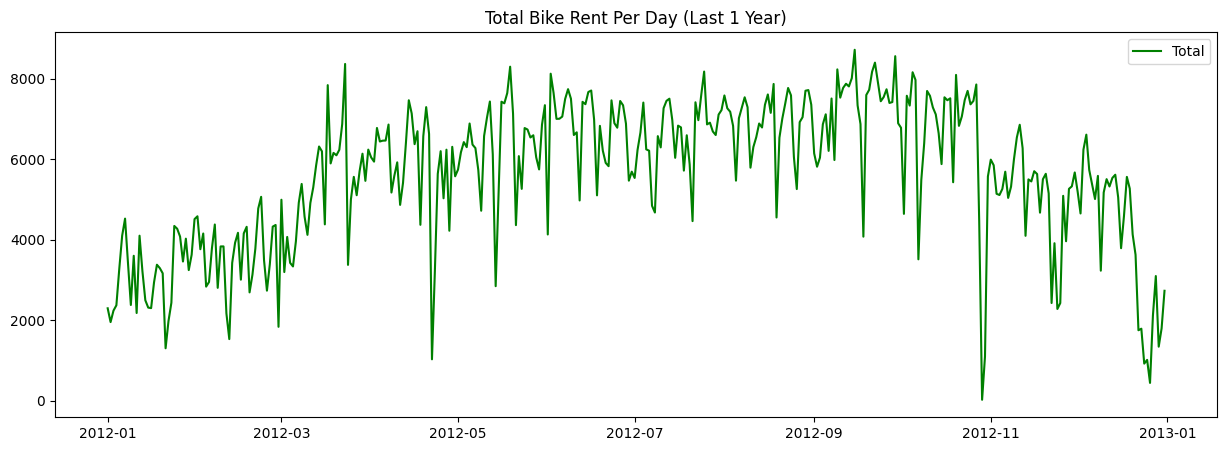

In [48]:
plt.figure(figsize = (15, 5))

plt.plot(
    user_day_df.dteday,
    user_day_df.cnt,
    label='Total',
    color='green'
)

plt.title('Total Bike Rent Per Day (Last 1 Year)')
plt.legend()
plt.show()

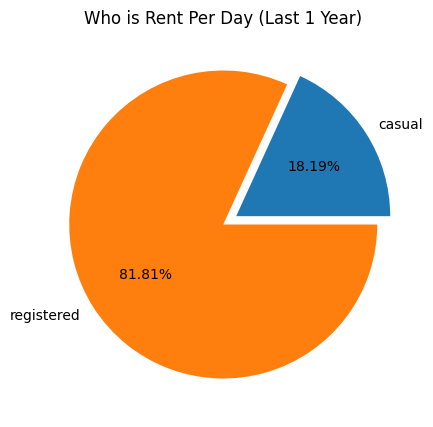

In [49]:
plt.figure(figsize=(15,5))
plt.pie(
    user_day_df[['casual', 'registered']].sum(),
    labels=['casual', 'registered'],
    autopct='%.2f%%',
    explode=[0.1, 0]
)

plt.title('Who is Rent Per Day (Last 1 Year)')

plt.show()

### Pertanyaan 2: Di musim apa sepeda paling sering disewakan?

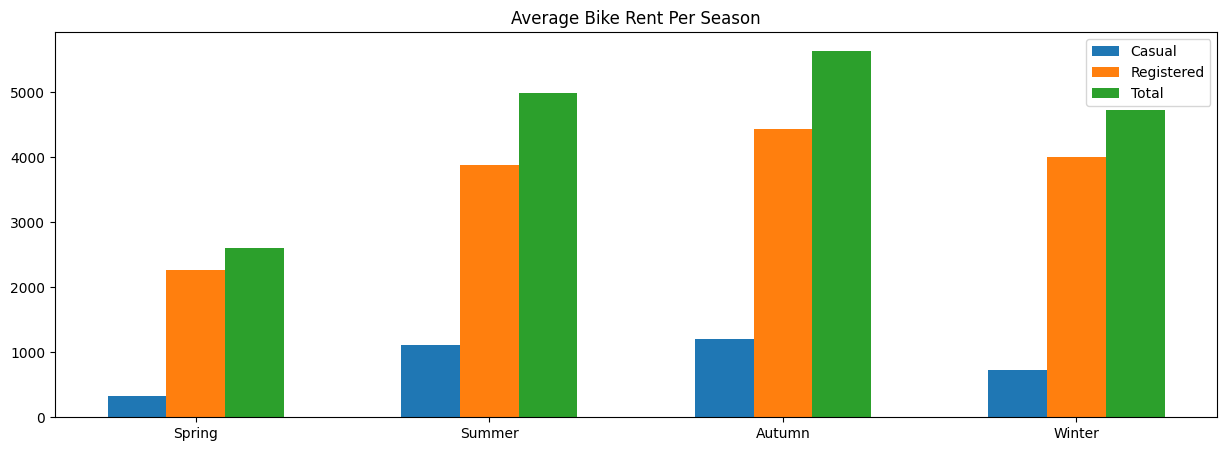

In [50]:
width = 0.2
plt.figure(figsize = (15, 5))

plt.bar(
    user_season_df.index - width,
    user_season_df.casual,
    label = 'Casual',
    width = width
)
plt.bar(
    user_season_df.index,
    user_season_df.registered,
    label = 'Registered',
    width = width
)
plt.bar(
    user_season_df.index + width,
    user_season_df.cnt,
    label = 'Total',
    width = width
)

plt.xticks(user_season_df.index, user_season_df.season_new)
plt.title('Average Bike Rent Per Season')
plt.legend()
plt.show()

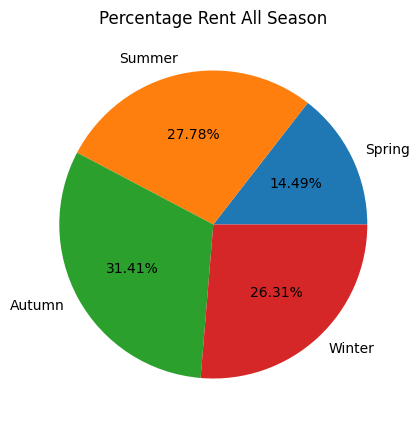

In [51]:
plt.figure(figsize=(15,5))
plt.pie(
    user_season_df.cnt,
    labels=user_season_df.season_new,
    autopct='%.2f%%',
)

plt.title('Percentage Rent All Season')

plt.show()

### Pertanyaan 3: Di hari apa sepeda paling sering disewakan?

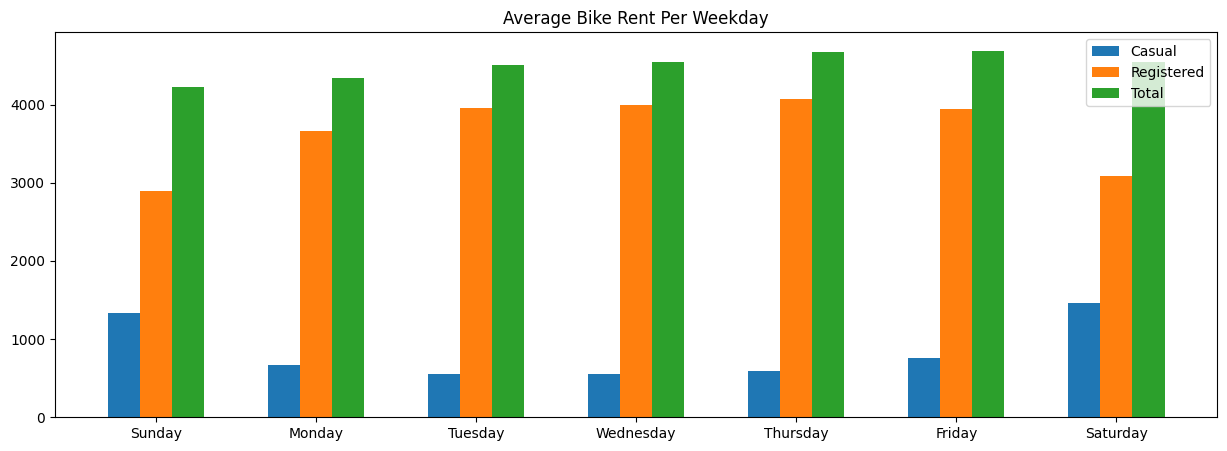

In [52]:
width = 0.2
plt.figure(figsize = (15, 5))

plt.bar(
    user_weekday_df.index - width,
    user_weekday_df.casual,
    label = 'Casual',
    width = width
)
plt.bar(
    user_weekday_df.index,
    user_weekday_df.registered,
    label = 'Registered',
    width = width
)
plt.bar(
    user_weekday_df.index + width,
    user_weekday_df.cnt,
    label = 'Total',
    width = width
)

plt.xticks(user_weekday_df.index, user_weekday_df.weekday_new)
plt.title('Average Bike Rent Per Weekday')
plt.legend()
plt.show()

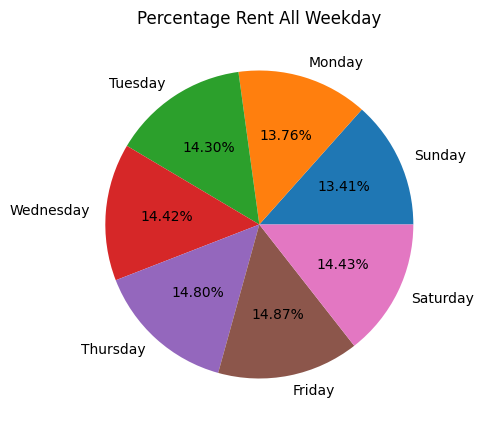

In [53]:
plt.figure(figsize=(15,5))
plt.pie(
    user_weekday_df.cnt,
    labels=user_weekday_df.weekday_new,
    autopct='%.2f%%',
)

plt.title('Percentage Rent All Weekday')

plt.show()

### Pertanyaan 4: Jam berapa sepeda paling sering disewakan?

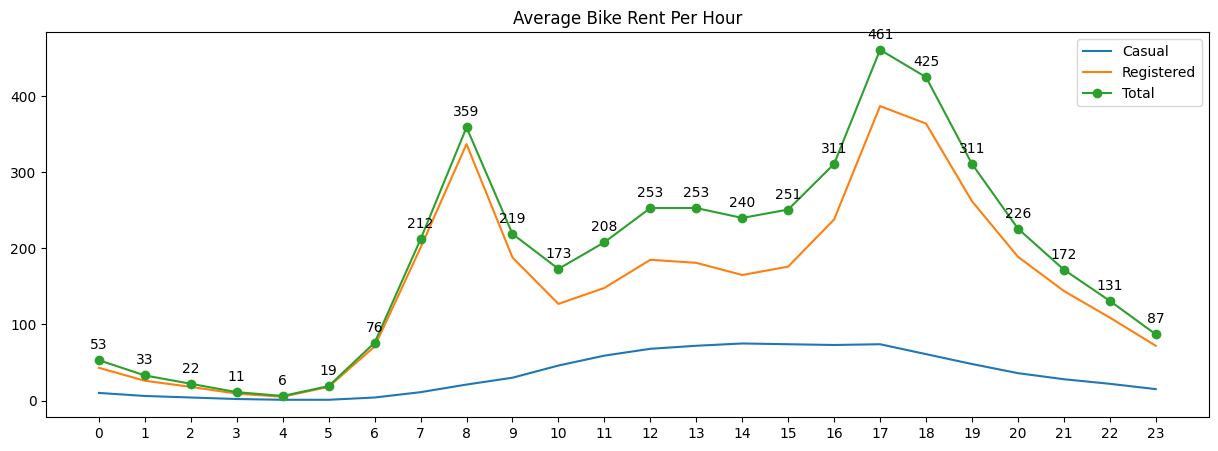

In [54]:
plt.figure(figsize = (15, 5))

plt.plot(
    user_hour_df.hr,
    user_hour_df.casual,
    label = 'Casual'
)
plt.plot(
    user_hour_df.hr,
    user_hour_df.registered,
    label = 'Registered'
)
plt.plot(
    user_hour_df.hr,
    user_hour_df.cnt,
    label = 'Total',
    marker = 'o'
)

for i, value in enumerate(user_hour_df.cnt):
    plt.annotate(f'{int(value)}', (i, value), textcoords="offset points", xytext=(0, 8), ha='center')

plt.xticks(user_hour_df.index)
plt.title('Average Bike Rent Per Hour')
plt.legend()
plt.show()

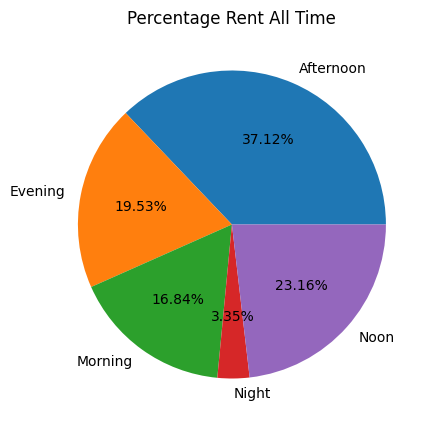

In [55]:
plt.figure(figsize=(15,5))
plt.pie(
    user_hour_cat_df.cnt,
    labels=user_hour_cat_df.hr_cat,
    autopct='%.2f%%',
)

plt.title('Percentage Rent All Time')

plt.show()

### Pertanyaan 5: Di suhu berapa sepeda paling sering disewakan?

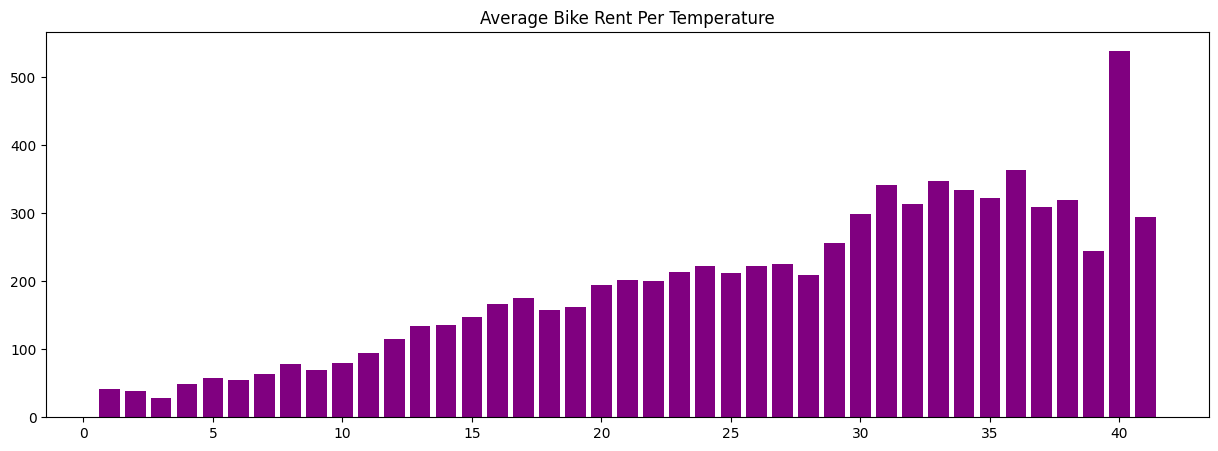

In [56]:
plt.figure(figsize = (15, 5))

plt.bar(
    user_temp_df.temp,
    user_temp_df.cnt,
    color = 'purple'
)

plt.title('Average Bike Rent Per Temperature')
plt.show()

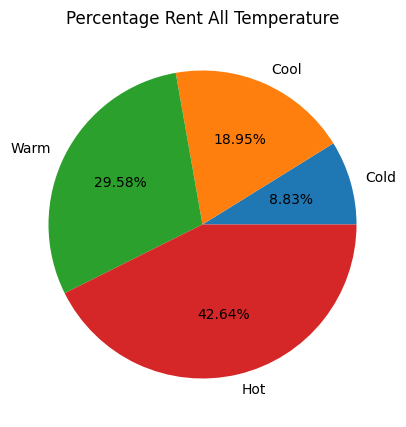

In [57]:
plt.figure(figsize=(15,5))
plt.pie(
    user_temp_cat_df.cnt,
    labels=user_temp_cat_df.temp_cat,
    autopct='%.2f%%',
)

plt.title('Percentage Rent All Temperature')

plt.show()

## Analisis Lanjutan (Opsional)

In [58]:
day_df.to_csv('data/new-day.csv', index=False)
hour_df.to_csv('data/new-hour.csv', index=False)

## Conclusion

- Conclution pertanyaan 1: Bagaimana perkembangan penyewaan sepeda selama 1 tahun terakhir?
  - Penyewaan dalam 1 tahun terakhir **tidak stabil** karena memiliki standar deviasi yang cukup tinggi, yaitu mencapai `31.94%` dengan rata-rata `5599.93` di semua tanggal.
  - Penyewaan **tinggi** pengguna total mencapai `8714` pengguna per hari dan **terendah** mencapai `22`.
- Conclution pertanyaan 2: Di musim apa sepeda paling sering disewakan?
  - Rata-rata penyewaan per musim penggona *total* mencapai `4492.00` dengan standar deviasi `29.30%`.
  - Penyewaan pengguna *total* mengikuti mayoritas, yaitu **tertinggi** di musim `Kemarau` dan **terendah** di musim `Semi`.
- Conclution pertanyaan 3: Di hari apa sepeda paling sering disewakan?
  - Rata-rata penyewaan per hari penggona *total* `4504.42` dengan standar deviasi `3.73%`.
  - Penyewaan pengguna *total* **mengikuti mayoritas** pengguna *terdaftar*, yaitu **tertinggi** di hari `Jumat` dan **terendah** di hari `Minggu`.
  - Uniknya penyewaan **tertinggi** pengguna *kasual* ada di **akhir pekan** sedangkan pengguna *terdaftar* ada di **hari kerja**, yang membuat standar deviasi pengguna *total* menjadi **sangat stabil**.
- Conclution pertanyaan 4: Jam berapa sepeda paling sering disewakan?
  - Rata-rata pengguna *total* per jam mencapai `188.00` dengan standar deviasi `69.97%`.
  - Rata-rata pengguna *total* per kategori jam mencapai `215.00` dengan standar deviasi `60.75%`.
  - Penyewaan pengguna *total* **mengikuti mayoritas** pengguna *terdaftar*, yaitu **tertinggi** di `Sore (Afternoon)` hari, terutama di jam `17`, dan **tereandah** di `Malam (Night)` hari, terutama di jam `4`.
- Conclution pertanyaan 5: Di suhu berapa sepeda paling sering disewakan?
  - Rata-rata pengguna *total* per suhu mencapai `195.82` dengan standar deviasi `58.51%`.
  - Rata-rata pengguna *total* per kategori suhu mencapai `195.25` dengan standar deviasi `57.96%`.
  - Penyewaan pengguna *total* **mengikuti mayoritas**, yaitu **tertinggi** di kategori `Panas`, terutama di suhu `40`, dan **tereandah** di kategori `Dingin`, terutama di suhu `3`.